<a href="https://colab.research.google.com/github/neharikajsh/Flood_Prediction/blob/main/Flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Import

In [18]:
#import flood data from my repository
data = pd.read_csv('https://raw.githubusercontent.com/neharikajsh/Flood_Prediction/main/data.csv')
data.head()

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,0V,DEC,ANNUAL RAINFALL,FLOOD
0,108,108001,2000,158.83,162.37,210.68,192.51,214.73,157.55,98.80,165.63,289.14,388.77,313.59,213.60,2566.19,0
1,108,108001,2001,159.10,41.71,174.50,220.56,177.65,105.61,166.59,193.88,206.40,298.14,232.54,150.82,2127.50,1
2,108,108001,2002,61.25,50.34,88.15,207.13,115.01,96.08,115.78,111.12,285.96,206.94,261.33,264.61,1863.70,1
3,108,108001,2003,82.88,118.04,193.40,100.36,101.07,166.81,167.61,270.87,238.84,682.07,251.46,182.35,2555.77,1
4,108,108001,2004,119.30,71.16,120.80,138.74,120.27,146.03,145.35,172.92,222.61,360.21,187.22,168.79,1973.39,1


### **Exploratory Data Analysis (EDA)**

In [19]:
#checking if there are any columns with null values
data.isnull().sum()

STATE              0
DISTRICT           0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
0V                 0
DEC                0
ANNUAL RAINFALL    0
FLOOD              0
dtype: int64

### Checking the predicting label data

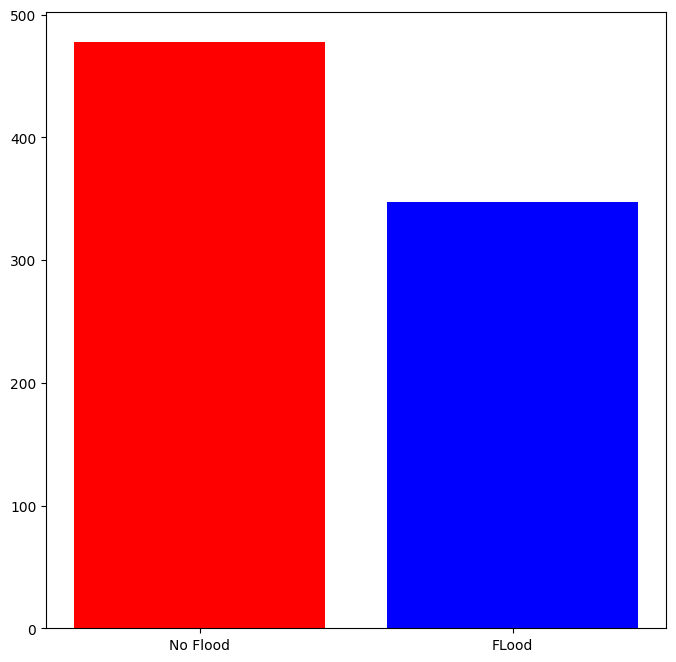



FLOOD 
0    478
1    347
Name: count, dtype: int64


In [20]:
# let's take Y for the prediction label which is Flood
# 0 is no flood
# 1 is flood

temp = data.iloc[:, -1]

classes = temp.unique()
category_counts = []

for i in classes:
  count = len(temp[temp==i])
  category_counts.append(count)


plt.figure(figsize=(8, 8))
plt.bar(['No Flood','FLood'],category_counts,color=['red','blue'])
plt.show()

print('\n')
print(temp.value_counts())

The No Flood category is higher than Flood category so it's better to balance this for accurate results.

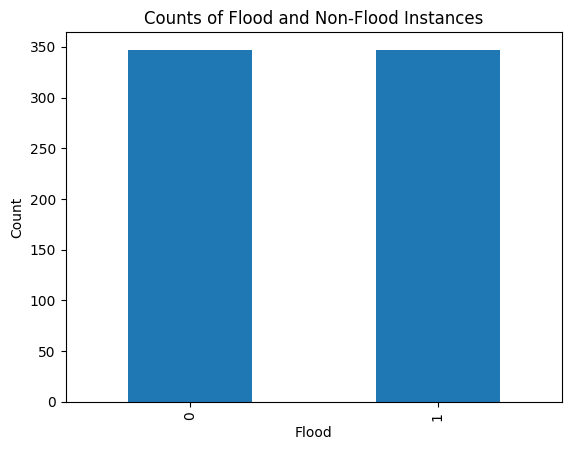

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,0V,DEC,ANNUAL RAINFALL,FLOOD
0,113,113012,2005,559.46,304.48,310.22,206.70,291.92,269.24,176.72,130.80,212.56,355.12,252.20,287.91,3357.33,0
1,109,109001,2003,27.35,32.42,191.05,63.11,131.09,142.49,184.87,308.08,267.26,589.99,223.87,147.01,2308.59,0
2,101,101002,2000,231.12,142.74,177.16,188.06,88.42,144.45,203.78,246.16,207.76,230.71,271.39,293.68,2425.44,0
3,109,109002,2002,109.86,107.97,153.12,365.64,119.74,111.47,143.27,198.50,293.14,232.22,342.96,281.83,2459.71,0
4,109,109002,2008,283.20,161.01,427.87,255.56,103.91,193.20,150.80,234.05,184.39,351.92,383.81,235.25,2964.99,0


In [21]:

# Select the 16th column which is index 15 in zero-based indexing
flood_column = data.iloc[:, 16]

# Count the number of flood and non-flood instances
flood_count = len(data[flood_column == 1])
not_flood_count = len(data[flood_column == 0])

# Balance the data by sampling
sampled_not_flood = data[flood_column == 0].sample(n=flood_count, random_state=42)
flood = data[flood_column == 1]

sampled_not_flood.reset_index(drop=True, inplace=True)
flood.reset_index(drop=True, inplace=True)

balanced_data = pd.concat([sampled_not_flood, flood]).reset_index(drop=True)

# Plot the counts of flood and non-flood instances
balanced_data.iloc[:,16].value_counts().plot(kind='bar')
plt.xlabel('Flood')
plt.ylabel('Count')
plt.title('Counts of Flood and Non-Flood Instances')
plt.show()

balanced_data.head()


### Checking the rainy season from May - Sep

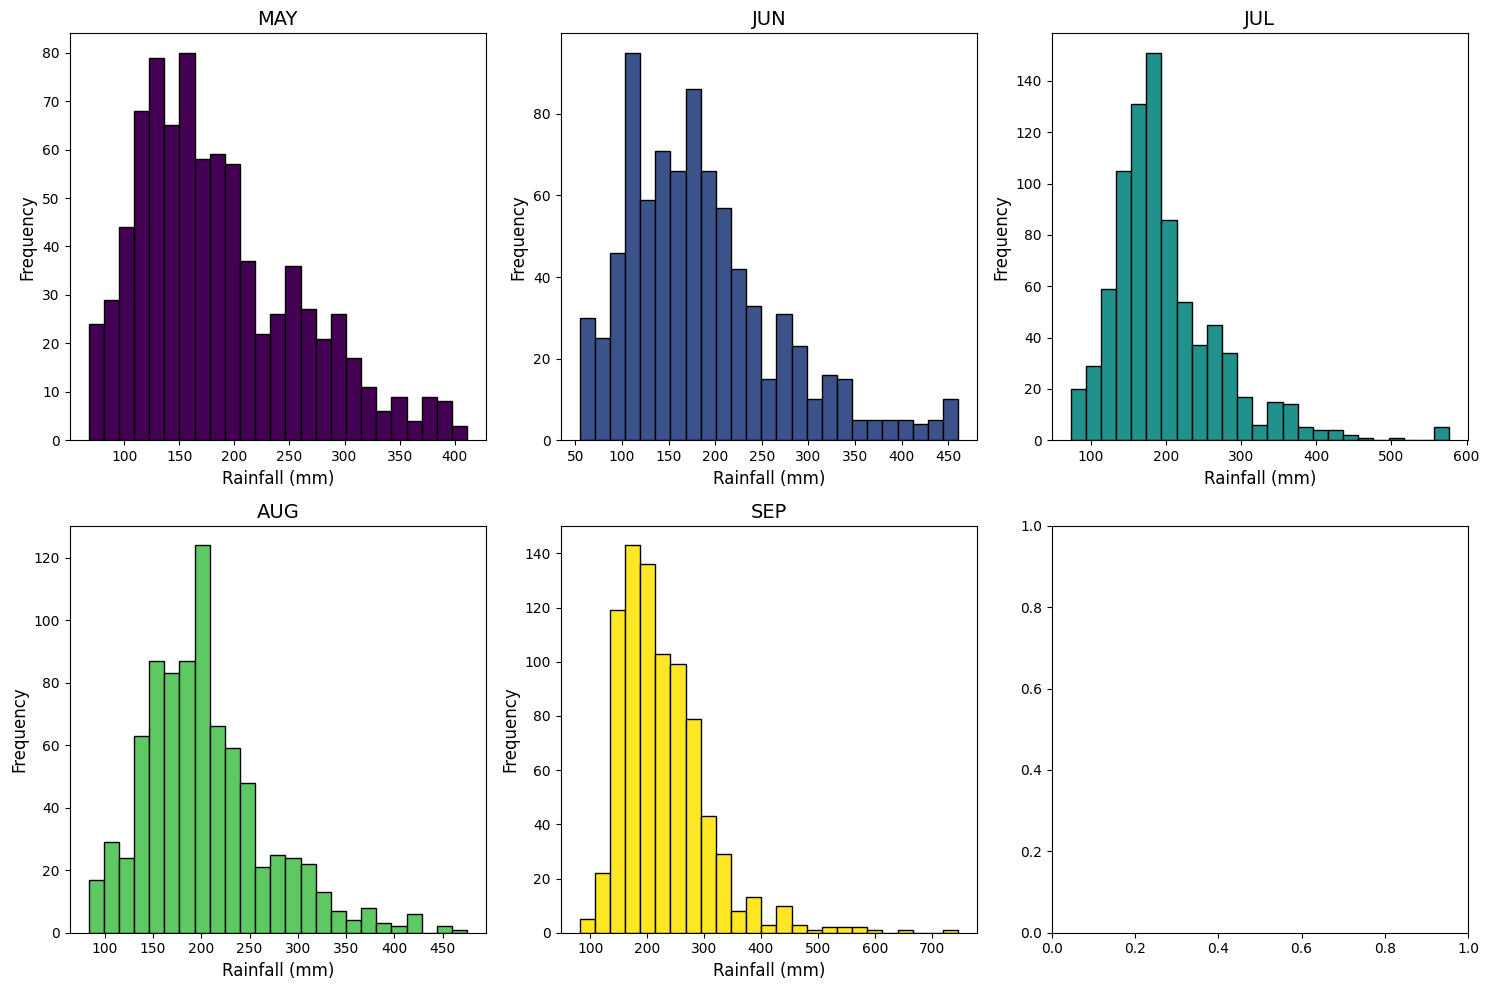

In [22]:
# Select the columns for months from May to September
monthly_rainfall = data[['MAY', 'JUN', 'JUL', 'AUG', 'SEP']]

# Define the bins
bins = 25#range(0, 500 + 2, 2)

# Create histograms for each month
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

months = monthly_rainfall.columns
colors = plt.cm.viridis(np.linspace(0, 1, len(months)))

for i, month in enumerate(months):
    axes[i].hist(monthly_rainfall[month], bins=bins, color=colors[i], edgecolor='black')
    axes[i].set_title(f'{month}', fontsize=14)
    axes[i].set_xlabel('Rainfall (mm)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [23]:
#let's extract features from the original data that can help us predict the flood
x = balanced_data.iloc[:,3:15]
y = balanced_data.iloc[:,-1]

### Scale the data

In [24]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

### Train & Test Split

In [25]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split

#Splitting the training and testing set with 70% to 30%s

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Prediction Algorithms:

# 1. LSTM MODEL

In [26]:
features = balanced_data.iloc[:, 3:15].values  # Assuming columns JAN to DEC are 3rd to 14th
target = balanced_data.iloc[:,-1].values

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Prepare sequences for LSTM
seq_length = 12  # Number of months considered for prediction
X = []
y = []
for i in range(len(features_scaled) - seq_length):
    X.append(features_scaled[i:i+seq_length])
    y.append(target[i+seq_length])

X = np.array(X)
y = np.array(y)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(seq_length, X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model (optional, if you have a separate test set)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation Accuracy: {accuracy}')

# Make predictions (optional, for new data)
# predictions = model.predict(new_data)

# Save or deploy the model as needed
# model.save('flood_prediction_model.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6352 - loss: 0.6692 - val_accuracy: 0.6788 - val_loss: 0.6170
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7424 - loss: 0.5665 - val_accuracy: 0.7445 - val_loss: 0.5161
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7689 - loss: 0.4472 - val_accuracy: 0.8467 - val_loss: 0.3550
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9122 - loss: 0.2859 - val_accuracy: 0.9343 - val_loss: 0.2075
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9561 - loss: 0.1568 - val_accuracy: 0.9270 - val_loss: 0.1618
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9667 - loss: 0.1139 - val_accuracy: 0.9562 - val_loss: 0.1118
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9736 - loss: 0.0806 - val_accuracy: 0.9635 - val_loss: 0.0916
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9765 - loss: 0.0644 - val_accuracy: 0.9854 - val_loss: 0.06

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_binary))


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      0.98      0.99        52

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

Confusion Matrix:
[[85  0]
 [ 1 51]]
